In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load .csv file into a pandas dataframe
df = pd.read_csv('spotify_tracks.csv')

# Check for row and column count
print(df.shape)

# Inspect first five rows
df.head(5)

In [ ]:
# Get a list of column names in the dataframe
df.columns

# Drop unuseful columns. axis = 1 denotes a column should be dropped. To drop rows, axis = 0
df = df.drop("Unnamed: 0", axis=1)



In [ ]:
# Check datatypes in the dataframe
df.dtypes

In [10]:
# Track missing values using the count of Null values using .isna() chained to .sum()
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
# Check an entire row where a column is empty using .loc, that returns a specifi index of the df
df.loc[df['artists'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [ ]:
# Find duplicated data in a dataset using .duplicated()
df.duplicated(keep=False).sum()

894

In [ ]:
# Find duplicated data by a column that 'should' be unique
df.loc[df["track_id"].duplicated(keep=False)].sort_values("track_id")

# Univariate Analysis

Analysis of individual columns.<br>

### Classify Data:<br>
- Qualitative Data <br>
- Quantitative Data

## Statistical Concepts

- <ins>**Central Tendency:**</ins> Location of middle values in a distribution. Three possible values:<br>
        1 - **Mean**: average of a range of valuables. *Usually the value used for central tendency.*<br>
        2 - **Median**: the middle value in a range of values. It is the most robust value for Central Tendency. *Usually the value used for a highly skewed distribution* <br>
        3 - **Mode**: most frequently occurring value in a dataset. *Usually the value used for a categorical*<br>
        <br>
- <ins>**Spread:**</ins> How far from the middle the values in a distribution fall<br>
        1 - **Variance**: mean of the squares of the individual deviations. *Usually the value used for central tendency.*<br>
        2 - **Standard Deviation**: square root of the variance. It has the same units of the original data  *Usually the value used for a normal distribution* <br>
        3 - **Interquartile Range**: deals with **quartiles**. It is the value obtained by subtracting quartile 1 *(Q1)* from quartile 3 *(Q3)* ***Q3 -Q1***.<br> It is the most robust value for Spread because it is the least value affected by outliers in the data. <br>
        *Usually the value used for a highly skewed distribution*<br>
        <br>
- <ins>**Skewness:**</ins> measure of symmetry in the data, ow much of the data falls in the middle of the distribution.<br>
An ideal distribution would have a skew value of **zero**. <br>
If dataset if highly skewed, it should be normalized before doing any statistical analysis.<br>
<br>
- <ins>**Kurtosis:**</ins> the oopposite of Skewness, this measure how mucb of the data falls on the tails/edges of the distribution.<br>
An normal distribution would have a kurtosis value of **three**.




In [ ]:
# Get count of unique values
df['artists'].value_counts()

In [ ]:
# Get the summary statistics of all quantitative variables
df.describe()


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


When `mean` is smaller than `median`, the distribution might be negatively skewed.<br>
For example, `danceability` in the dataset.<br>
When `min` is smaller tha the first quartile (25%), it is possible that there outliers in the distribution.<br>

## Ploting for Univariate Analysis

Use a **`Histogram`** to show skewness of data.<br>
Data more towards the left of the middle of the distribution means that the data is *'slightly negatively skewed'*.

<Axes: >

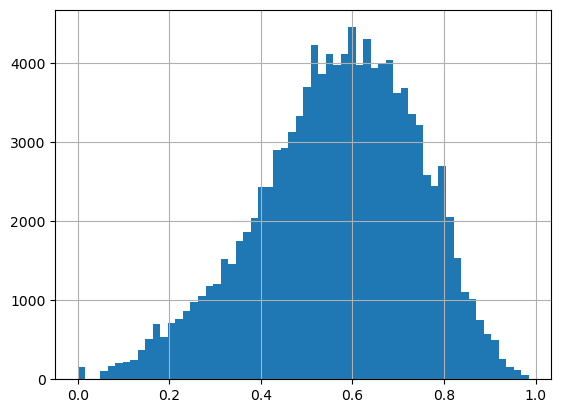

In [19]:
df['danceability'].hist(bins=60)

Use `seaborn` to plot a **`Boxplot`** to show quartile values<br>
The middle line inside of the blue box is the `median` value (0.5) or Q2 (quartile 2)<br>
The left side of the box is Q1, the right side is Q3.<br>
The width of the bue box is the `Interquartile Range` of the distribution (Q3 - Q1)<br>
The lines to the side of the plot are the `whiskers` of the boxplot and they represent the `min` and `max` as determined by the interquartile range (IQR).<br>
The `min` value is calculated by `min_whisker = min(x | x ≥ Q1 − 1.5 × IQR)`<br>
The `max` value is calculated by `max_whisker = max(x | x ≤ Q3 + 1.5 × IQR)`<br>
Anything that falls outside `min` and `max` are considered outliers.

<Axes: xlabel='danceability'>

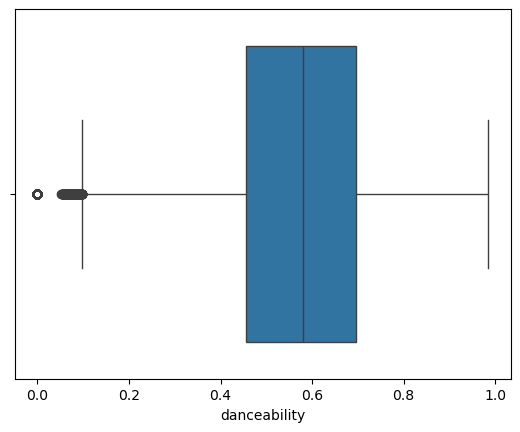

In [22]:
sns.boxplot(x=df["danceability"])